# Supervised Learning (Heart Data)


In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [60]:
import csv 
data = pd.read_csv("Heart.csv")

In [61]:
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


AHD (Atherosclerosis and Coronary Artery Disease) is our Target Variable

In [62]:
df=df.drop(['Unnamed: 0'], axis=1)


In [63]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [64]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [65]:
df['Ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [66]:
df.Ca.fillna(df.Ca.mode()[0],inplace=True)

In [67]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
AHD          0
dtype: int64

In [68]:
df['Thal'].value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

In [69]:
df.Thal.fillna(df.Thal.mode()[0],inplace=True)

In [70]:
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [71]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
Sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
RestBP,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
Chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
Fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
RestECG,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
MaxHR,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
ExAng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
Oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
Slope,303.0,1.600660,0.616226,1.0,1.0,2.0,2.0,3.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age          303 non-null int64
Sex          303 non-null int64
ChestPain    303 non-null object
RestBP       303 non-null int64
Chol         303 non-null int64
Fbs          303 non-null int64
RestECG      303 non-null int64
MaxHR        303 non-null int64
ExAng        303 non-null int64
Oldpeak      303 non-null float64
Slope        303 non-null int64
Ca           303 non-null float64
Thal         303 non-null object
AHD          303 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 33.2+ KB


In [73]:
df['Sex'].value_counts() #Male count is 206 while Female count is 97

1    206
0     97
Name: Sex, dtype: int64

In [74]:
df['Fbs'].value_counts() #Fbs>120 or value = 1 is considered as Diabetic

0    258
1     45
Name: Fbs, dtype: int64

In [75]:
df['RestECG'].value_counts() #Value = 0 Normal, Value=1 Having ST-wave abnormality, Value=2 showing proable definite left veticular hypertrophy

0    151
2    148
1      4
Name: RestECG, dtype: int64

In [76]:
df['ExAng'].value_counts() #Exercise Induced Angima

0    204
1     99
Name: ExAng, dtype: int64

In [77]:
df['Slope'].value_counts()  #Value1 is unsloping, Value2 is flat, Value3 is downsloping 

1    142
2    140
3     21
Name: Slope, dtype: int64

In [78]:
df['Thal'].value_counts()

normal        168
reversable    117
fixed          18
Name: Thal, dtype: int64

In [79]:
df_new = pd.get_dummies(df,drop_first=True)
df_new.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0,1
2,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0,0


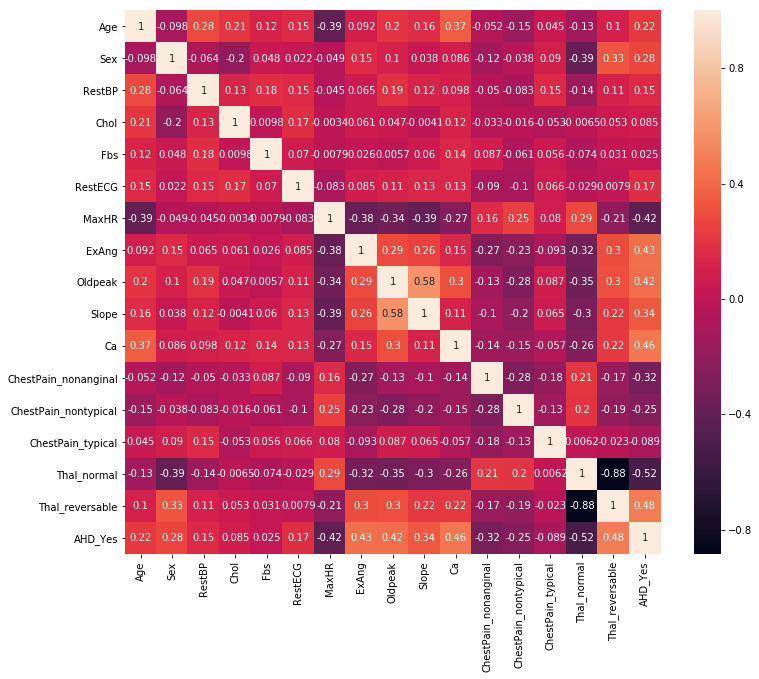

In [80]:
plt.figure(figsize=(12,10))
sns.heatmap(df_new.corr(),annot=True)

In [81]:
df_new.groupby('AHD_Yes').mean()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
AHD_Yes,,,,,,,,,,,,,,,,
0,52.585366,0.560976,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.268293,0.414634,0.250000,0.097561,0.792683,0.170732
1,56.625899,0.820144,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,1.129496,0.129496,0.064748,0.050360,0.273381,0.640288


# Insights from Data Exploration

1. Age of a person who is having AHD (Atherosclerotic Heart Disease) is having more age with an average age are above 55

2. RestBp(Resting Blood Pressure) & Cholosteroal Level(Chol) for persons having AHD is High

# Model

In [84]:
X=df_new[["Age","Sex","RestBP","Chol","Fbs","RestECG","MaxHR","ExAng","Oldpeak","Slope","Ca","ChestPain_nonanginal","ChestPain_nontypical","ChestPain_typical","Thal_normal","Thal_reversable"]]
Y=df_new["AHD_Yes"]

In [85]:
model=LogisticRegression()

In [86]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [94]:
model.fit(x_train,y_train)

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
pred_train=model.predict(x_train)
pd.crosstab(y_train,pred_train)

col_0,0,1
AHD_Yes,,
0,107,8
1,20,77


# Accuracy

In [91]:
Acc = (107+77)/x_train.shape[0]
print(Acc*100)

86.79245283018868


In [95]:
pred_test=model.predict(x_test)
pd.crosstab(y_test,pred_test)

col_0,0,1
AHD_Yes,,
0,45,4
1,6,36


In [96]:
Acc = (45+36)/x_test.shape[0]
print(Acc*100)

89.01098901098901


# Senstivity/Recall

In [105]:
Senstivity = (36)/(6+36)
print('Senstivity=',Senstivity)

Senstivity= 0.8571428571428571


# Precision

In [107]:
Precision = (36)/(4+36)
print('Precision=',Precision)

Precision= 0.9


In [99]:
import statsmodels.discrete.discrete_model as sm
from statsmodels.api import add_constant

In [101]:
X2=add_constant(x_train)

In [102]:
logit=sm.Logit(y_train,X2)

In [103]:
res=logit.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\discrete\discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [104]:
print(res.summary())

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\discrete\discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                           Logit Regression Results                           
Dep. Variable:                AHD_Yes   No. Observations:                  212
Model:                          Logit   Df Residuals:                      195
Method:                           MLE   Df Model:                           16
Date:                Fri, 11 Jan 2019   Pseudo R-squ.:                     inf
Time:                        21:23:30   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.7735      3.223     -0.861      0.389      -9.091       3.543
Age                     -0.0109      0.029     -0.371      0.711      -0.069       0.047
Sex         

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
